In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv("wine.csv")

In [3]:
wine.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.shape

(178, 14)

In [5]:
wine['class'].unique()

array([1, 2, 3], dtype=int64)

In [6]:
wine.groupby('class').size()

class
1    59
2    71
3    48
dtype: int64

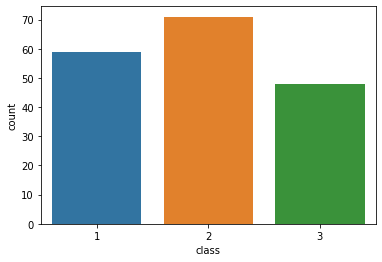

In [7]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import seaborn as sns
sns.countplot(wine['class'], label="Count")
plt.show()

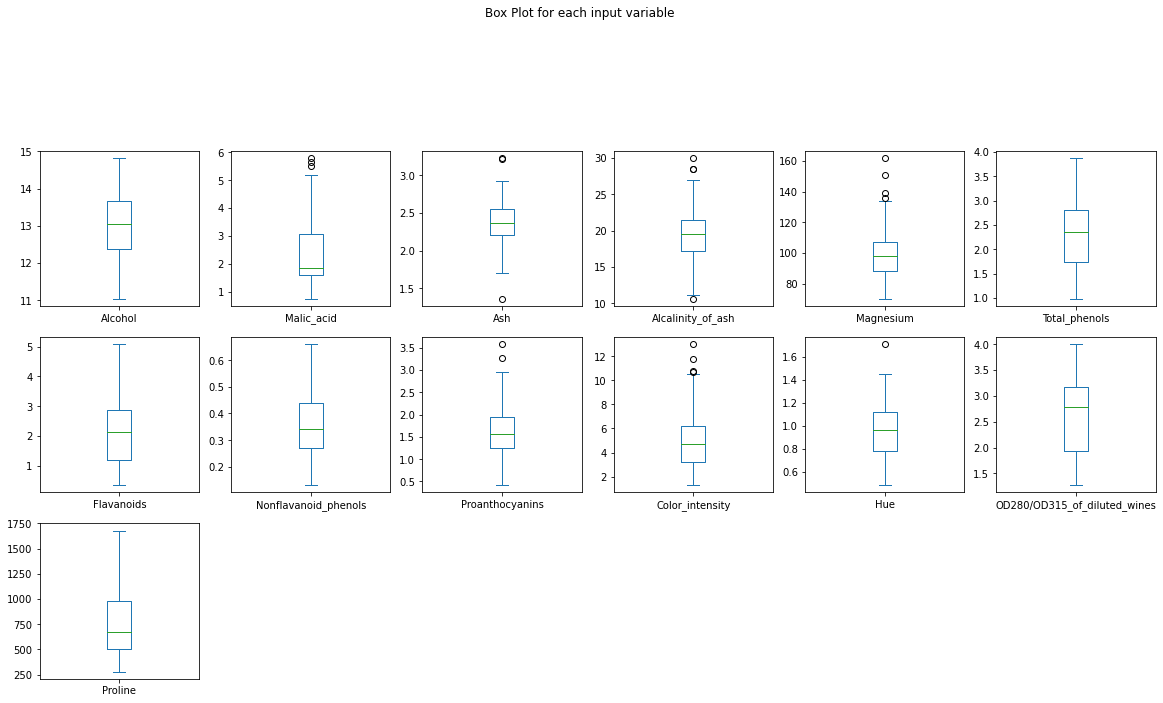

In [8]:
wine.drop('class', axis=1).plot(kind="box", subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(20,20), title="Box Plot for each input variable")
plt.show()

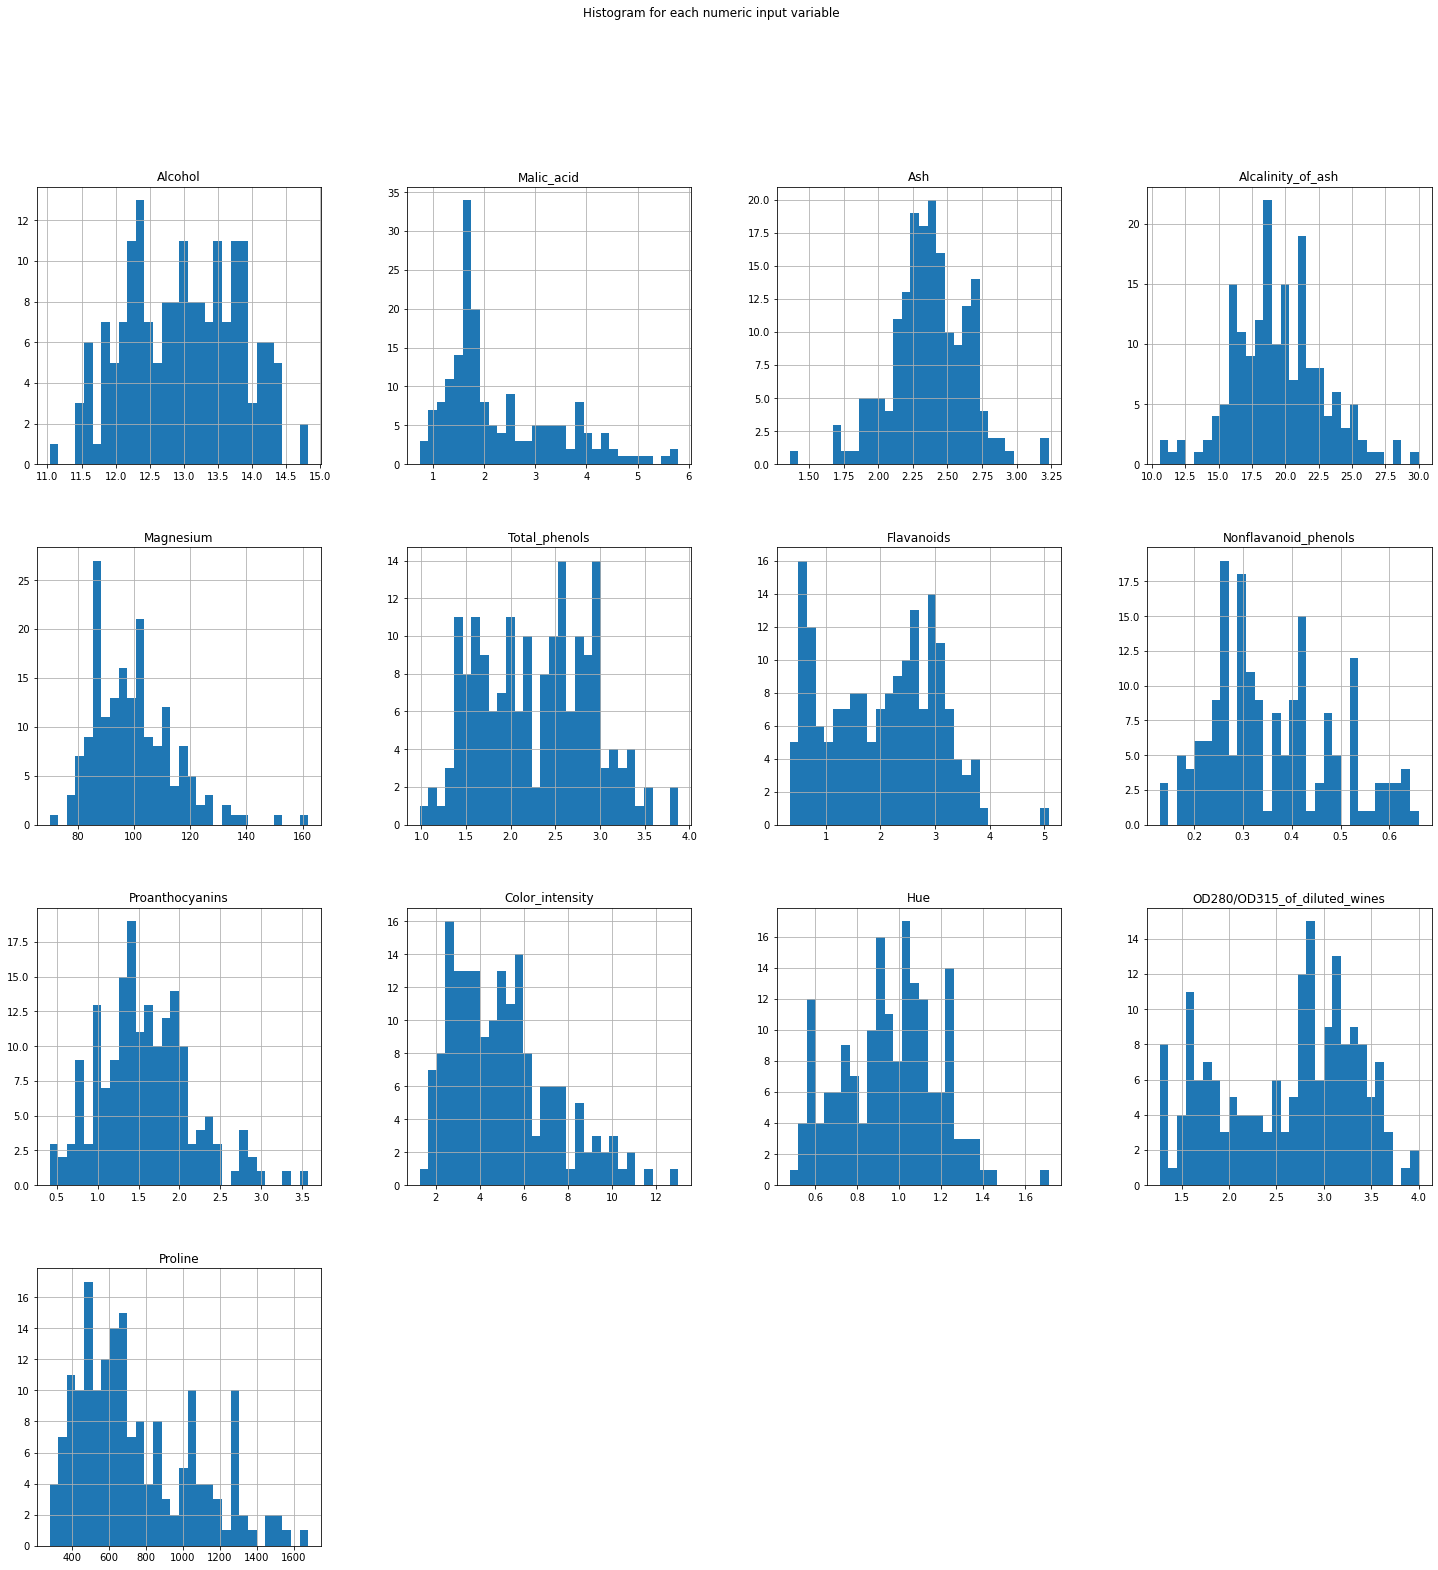

In [9]:
import pylab as pl
wine.drop('class', axis=1).hist(bins=30, figsize=(25,25))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

## Whale Optimization Algorithm

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from numpy.linalg import norm


def WOA(wine, lb, ub, dim ,SearchAgent, maxIter):
    
    whalePop = []
    for i in range(SearchAgent):
        tmp = np.random.rand(3*dim)*(ub-lb)-(ub-lb)/2
        whalePop.append(tmp)
        
    t = 0
    count = 0
    bestWhale = None
    currentBestWhale = None
    fitness_vec = []
    P = len(wine)
    b = 0.1
    
    while t<maxIter:
        
        fitnessPop = []
        # Evaluate the fitness values of whales and find out the best search agent
        for whale in whalePop:
            fitnessWhale = 0
            for p in range(P):
                distances = [norm(wine.iloc[p]-whale[0:13]),norm(wine.iloc[p]-whale[13:26]), norm(wine.iloc[p]-whale[26:39])]
                idxDist = np.argmin(distances)
                fitnessWhale += distances[idxDist]
            fitnessPop.append(fitnessWhale)
            count += 1
        
        
        idxFit = np.argmin(fitnessPop)
        bestWhale = whalePop[idxFit]
        fitness_vec.append(fitnessPop[idxFit])
        
        print("Iteration "+str(t)+", Fitness of best whale "+str(fitnessPop[idxFit]))
        
        for i,whale in enumerate(whalePop, 0):
            
            if i != idxFit:
                
                a = 2-(2*t)/maxIter
                r = np.ones(3*dim)*np.random.uniform(0,1,1)[0]
                A = 2*a*r-a
                C = 2*r
                p = np.random.uniform(0,1,1)[0]
                l = np.random.uniform(-1,1,1)[0]
            
                if p<0.5:
                    if norm(A)<1:
                        #Update position of agent
                        D = np.multiply(C,bestWhale)-whale
                        whalePop[i] = bestWhale-np.multiply(A,D)
                        
                    elif norm(A) >= 1: 
                        #Phase of exploration
                        #Select random agent and update position
                        XRand = np.random.rand(3*dim) #must not necessarily be in [0,1]
                        #D = np.abs(np.multiply(C,bestWhale)-whale)
                        D = np.multiply(C,bestWhale)-whale
                        whalePop[i] = XRand-np.multiply(A,D)
                        
                elif p>= 0.5:
                    #Phase of spiral
                    #Update position of agent
                    D_ = bestWhale-whale
                    whalePop[i] = D_*np.exp(b*l)*np.cos(2*np.pi*l)+bestWhale
                    
                #Bring back whale which is out of search space
                for j,coordinate in enumerate(bestWhale,0):
                    if coordinate > 1:
                        bestWhale[j] = 0.5
                    elif coordinate < 0:
                        bestWhale[j] = 0.5 
                        
        t +=1
        z1,z2,z3 = bestWhale[0:13],bestWhale[13:26],bestWhale[26:39]
        
    return z1,z2,z3

In [11]:
feature_names = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash','Magnesium',
                'Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins',
                 'Color_intensity','Hue','OD280/OD315_of_diluted_wines','Proline']
X = wine[feature_names]
y = wine['class']

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
wine = scaler.fit_transform(X)
wine = pd.DataFrame(wine)
wine = wine.sample(frac=1)

In [13]:
dim = len(wine.columns)
z1,z2,z3 = WOA(wine, 0, 1, dim, 10, 100)

Iteration 0, Fitness of best whale 275.05376168280367
Iteration 1, Fitness of best whale 143.5481896321133
Iteration 2, Fitness of best whale 143.5481896321133
Iteration 3, Fitness of best whale 143.5481896321133
Iteration 4, Fitness of best whale 143.5481896321133
Iteration 5, Fitness of best whale 139.95823786119132
Iteration 6, Fitness of best whale 138.28484588189804
Iteration 7, Fitness of best whale 138.28484588189804
Iteration 8, Fitness of best whale 138.28484588189804
Iteration 9, Fitness of best whale 138.2803827814797
Iteration 10, Fitness of best whale 135.64570396981347
Iteration 11, Fitness of best whale 135.64570396981347
Iteration 12, Fitness of best whale 135.27918030090234
Iteration 13, Fitness of best whale 134.95492067118158
Iteration 14, Fitness of best whale 134.50020697586288
Iteration 15, Fitness of best whale 134.50020697586288
Iteration 16, Fitness of best whale 134.50020697586288
Iteration 17, Fitness of best whale 134.50020697586288
Iteration 18, Fitness of 

In [14]:
cluster = []
P = len(wine)
for p in range(P):
    distances = [norm(wine.iloc[p]-z1),norm(wine.iloc[p]-z2),norm(wine.iloc[p]-z3)]
    cluster.append((np.argmin(distances)+1))
wine["cluster"] = cluster

In [15]:
counter = 0
P = len(wine)
for p in range(P):
    if wine.iloc[p].cluster == y.iloc[p]:
        counter += 1
acc = counter / P
print("acc: " + str(acc))

acc: 0.33146067415730335
